In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt


In [22]:
import pandas as pd

df = pd.read_csv('data/processed/fraudTrain_balanced.csv')
df.head()

X = df.drop(columns=['is_fraud'])
y = df['is_fraud']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [24]:
# 2. Treinar o modelo Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)


RandomForestClassifier(n_jobs=-1, random_state=42)

In [25]:
# 3. Fazer previsões
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

🔎 Relatório de Classificação:

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    257834
           1       0.99      1.00      1.00    257834

    accuracy                           1.00    515668
   macro avg       1.00      1.00      1.00    515668
weighted avg       1.00      1.00      1.00    515668

📊 Matriz de Confusão:


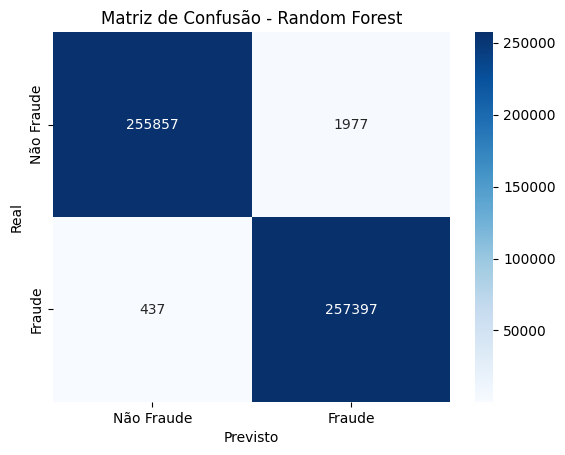

In [26]:
import seaborn as sns

y_pred = rf_model.predict(X_test)
# 4. Avaliação do modelo
print("🔎 Relatório de Classificação:\n")
print(classification_report(y_test, y_pred))

print("📊 Matriz de Confusão:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Não Fraude', 'Fraude'], yticklabels=['Não Fraude', 'Fraude'])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Random Forest")
plt.show()


📈 Pontuação ROC AUC: 0.9999


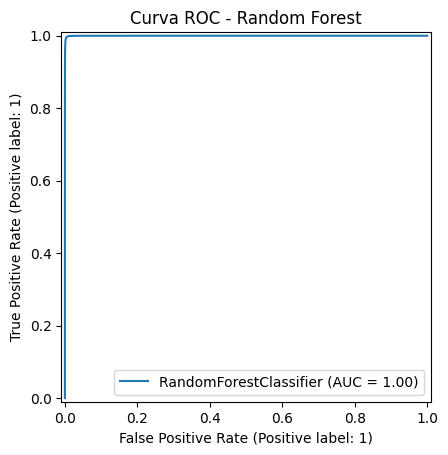

In [27]:
# 5. Curva ROC e AUC
roc_auc = roc_auc_score(y_test, y_proba)
print(f"📈 Pontuação ROC AUC: {roc_auc:.4f}")

RocCurveDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("Curva ROC - Random Forest")
plt.show()